In [54]:
import json
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas
import pickle
import torch
from scipy import stats
sns.set_style("darkgrid")


In [55]:
archs = torch.load('nb2_train_cf10_r8_c4_e4.p')
gt_accs = [x['testacc'] for x in archs]
num_steps = len(archs[0]['stepmeasures'])

In [56]:

def eval(archs, name='grad_norm', steps=num_steps):
    corrs = []
    for i in range(num_steps):
        accs = [x['stepmeasures'][i][name] for x in archs]
        tau, p = stats.spearmanr(accs, gt_accs)
        corrs.append(tau)
    return corrs


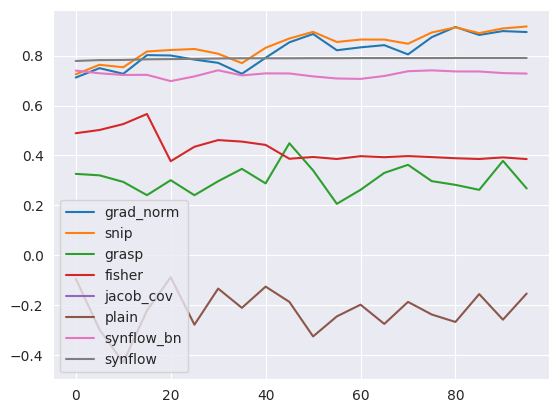

In [59]:
for name in archs[0]['stepmeasures'][0].keys():
    corrs = eval(archs, name)
    plt.plot([i*5 for i in range(len(corrs))], corrs, label=name)
plt.legend()
plt.savefig('./corr_with_steps.png')

In [58]:
archs

[{'idx': 5,
  'arch_str': '|nor_conv_1x1~0|+|skip_connect~0|nor_conv_1x1~1|+|nor_conv_3x3~0|none~1|avg_pool_3x3~2|',
  'logmeasures': [{'train_loss': 0,
    'val_loss': 2.75946015625,
    'val_acc': 0.1156,
    'epoch': 0},
   {'train_loss': 1.8137887716293335,
    'val_loss': 1.7791888671875,
    'val_acc': 0.349,
    'epoch': 1},
   {'train_loss': 1.7196202278137207,
    'val_loss': 1.6766541015625,
    'val_acc': 0.3859,
    'epoch': 2},
   {'train_loss': 1.5807580947875977,
    'val_loss': 1.5792869140625,
    'val_acc': 0.4233,
    'epoch': 3},
   {'train_loss': 1.5531976222991943,
    'val_loss': 1.537608984375,
    'val_acc': 0.4373,
    'epoch': 4}],
  'stepmeasures': [{'grad_norm': 3.3975470066070557,
    'snip': 6.449115753173828,
    'grasp': 0.07824447751045227,
    'fisher': 3.385792297194712e-05,
    'jacob_cov': (-185678955.4591961+3.5575383784680614e-20j),
    'plain': -0.08531709760427475,
    'synflow_bn': 244.95138655130233,
    'synflow': 6.936538264666493e+21},
   